# Image Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as image
import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading data
ds = open('data_files/galaxies/efigi.dat', 'r')

# Empty lists for the data
names = []  
types = []

# Appending information from data into lists
for line in ds:
    fields = line.split()
    names.append(fields[0])
    types.append(fields[1])

print(names)
print(types)

ndata = len(names)
imgsize = 64

['PGC0000212', 'PGC0000218', 'PGC0000255', 'PGC0000281', 'PGC0000282', 'PGC0000451', 'PGC0000548', 'PGC0000635', 'PGC0000639', 'PGC0000647', 'PGC0000670', 'PGC0000963', 'PGC0001058', 'PGC0001221', 'PGC0001224', 'PGC0001237', 'PGC0001293', 'PGC0001478', 'PGC0001523', 'PGC0001621', 'PGC0001713', 'PGC0001747', 'PGC0001781', 'PGC0001805', 'PGC0001841', 'PGC0001862', 'PGC0001909', 'PGC0001932', 'PGC0001936', 'PGC0002016', 'PGC0002035', 'PGC0002151', 'PGC0002182', 'PGC0002269', 'PGC0002288', 'PGC0002331', 'PGC0002352', 'PGC0002365', 'PGC0002388', 'PGC0002391', 'PGC0002440', 'PGC0002482', 'PGC0002501', 'PGC0002522', 'PGC0002527', 'PGC0002597', 'PGC0002600', 'PGC0002615', 'PGC0002768', 'PGC0002800', 'PGC0002805', 'PGC0002889', 'PGC0003072', 'PGC0003140', 'PGC0003232', 'PGC0003314', 'PGC0003377', 'PGC0003451', 'PGC0003496', 'PGC0003563', 'PGC0003566', 'PGC0003569', 'PGC0003584', 'PGC0003620', 'PGC0003781', 'PGC0003817', 'PGC0003830', 'PGC0003904', 'PGC0003960', 'PGC0003976', 'PGC0004116', 'PGC0

In [ ]:
# Creates an array of 64 lists wihtin 64 lists all of which contain 3 zeroes. This is to store the pixel values
galaxies = np.zeros((ndata, imgsize, imgsize, 3))
labels = np.zeros(ndata, dtype='int')
print(labels)

# Loops through all the images in the directory and loads them into the array
for i in range(ndata):
    img = image.open('data_files/galaxies/png/' + str(names[i]) + '.png')

    imgResized = img.resize(size=(imgsize, imgsize))

    galaxies[i,:,:,:] = np.array(imgResized) / 255
    labels[i] = types[i]

In [5]:
import random

# We want to create two datasets, one for training and one for testing. This takes the random index across 
# all the images and puts them in a list
size = labels.size
sample = random.sample([n for n in range(size)], int(0.3*size))

otherGalaxies = galaxies[sample,:,:,:]
trainGalaxies = np.delete(galaxies, sample, axis=0)
otherLabels = labels[sample]
trainLabels = np.delete(labels, sample, axis=0)

# Due to the value in the shape of these two, we know we did what we wanted to do.
print(otherGalaxies.shape)


(322, 64, 64, 3)


In [6]:
# Setting another subsample set
size = otherLabels.size
subsample = random.sample([n for n in range(size)], int(size/2))

# Splitting into train and validation sets
valdLabels = otherLabels[subsample]
valdGalaxies = otherGalaxies[subsample,:,:,:]
testLabels = np.delete(otherLabels, subsample)
testGalaxies = np.delete(otherGalaxies, subsample, axis=0)

In [7]:
# The network is created by the Sequential function which is within the keras module
galNet = keras.Sequential([
    # The individual layer creates 96 feature maps by applying convulational filters to image arrays with 
    # dimensions as defined by input shape
    keras.layers.Conv2D(96, (8,8), activation='relu', input_shape=(imgsize,imgsize,3)),
    # To reduce the amount of data generated by the convolution, we set up a pooling layer that reduces the size of the data
    # by downsampling the feature maps.
    keras.layers.MaxPooling2D(pool_size=(4,4)),
    # This flattens the data into a one-dimensional array before they go through the 30 neurons
    keras.layers.Flatten(),
    # This takes the flattened array through a fully connected layer with 30 neurons
    keras.layers.Dense(30, activation='relu'),
    # The signals from the nurons are distributed to three output nodes which represent the three classes of galaxies part of the
    # dataset.
    keras.layers.Dense(3, activation='softmax')
])

galNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 57, 57, 96)        18528     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18816)             0         
                                                                 
 dense (Dense)               (None, 30)                564510    
                                                                 
 dense_1 (Dense)             (None, 3)                 93        
                                                                 
Total params: 583,131
Trainable params: 583,131
Non-trainable params: 0
__________________________________________________

Before the network can be trained, it needs to be compiled using this

In [8]:
galNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

The optimizer keyword specifies th enumerical optimization algorithm that will be used to adjust the weights of the connections. The loss function is standard choice of loss function when using classification data. Lastly, the metrics keyword indicates that we'll use the accuracy of the network to measure the performance of the network


This will now train our network by inputting our training and validation data sets and setting the amount of iterations we want it to do with the `epochs` argument

In [ ]:
results = galNet.fit(trainGalaxies, trainLabels, epochs=40, validation_data=(valdGalaxies, valdLabels))

40


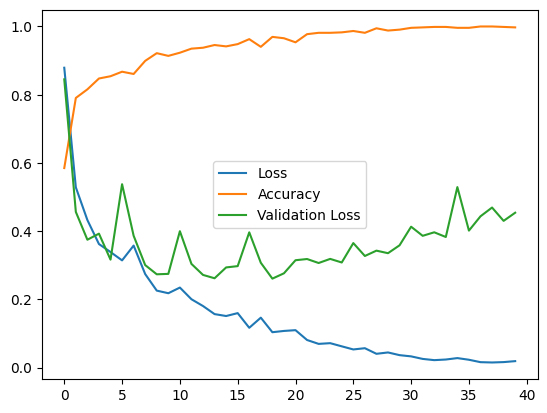

In [13]:
print(len(results.history['accuracy']))
plt.plot(range(40), results.history['loss'], label = 'Loss')
plt.plot(range(40), results.history['accuracy'], label = 'Accuracy')
plt.plot(range(40), results.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

Now that we have our network compiled and working, we can give it an image to try and classify. There's an image in the data directory that we'll use

In [21]:
img = image.open('data_files/galaxies/NGC_1232.jpg')

# We now have to resize the image so that it is in the same size as the images that we used to train the network
imgResized = img.resize(size=(imgsize, imgsize))

# Put this into an array of the same format with same dimensions as before
imgArr = np.array(imgResized)/255

# Expanding the dimension of the array to match our training data
imgArrExp = np.expand_dims(imgArr, axis=0)

print(imgArr.shape)
print(imgArr.shape)
print(imgArrExp.shape)

(64, 64, 3)
(64, 64, 3)
(1, 64, 64, 3)


You can see by the printed statement that we now have an array of the same format that our training images are 1 image, 64 by 64 pixels big, and 3 values representing RGB for each pixel. We can now throw this into a prediction function for the network to predict what the classification is

In [25]:
prediction = galNet.predict(imgArrExp)
labels = ['elliptical', 'spiral', 'irregular']

1/1 [==============================] - 0s 24ms/step


You can see here that in the previous cell, when we call the network to make a prediction on an image in the correct format, it returns that prediction as a numpy array of the shape 1 image with 3 percentages of what it calculated the classification to be. When we print the predictions we must flatten the array and loop through it in order to print out the predictions in a nice format. 

In [27]:
print(prediction.shape)
for i,p in enumerate(prediction.flatten()):
    print(f'{labels[i]:10s} {p:.4e}')

(1, 3)
elliptical 7.9723e-16
spiral     9.9065e-01
irregular  9.3464e-03


As you can see, the most likely type of galaxy this image is is a spiral which is correct

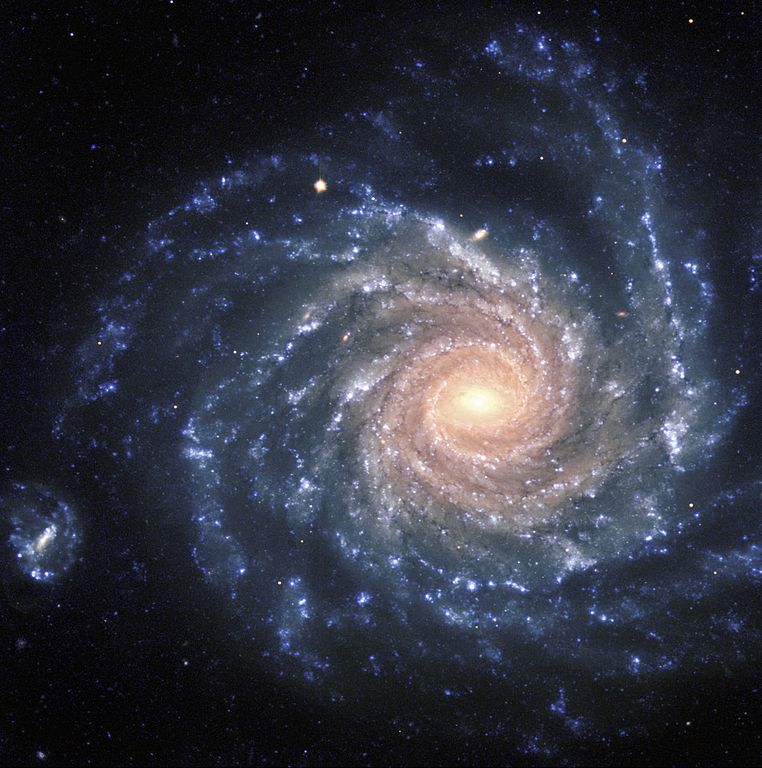